# Practice Lab - Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [27]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [28]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

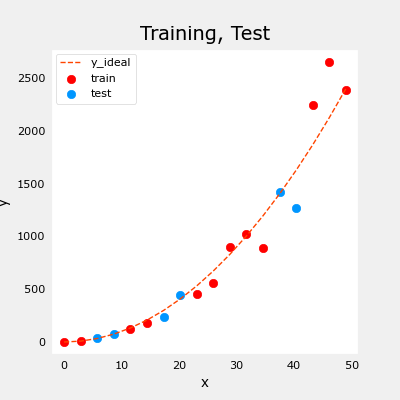

In [29]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [30]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)

In [31]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [32]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [33]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

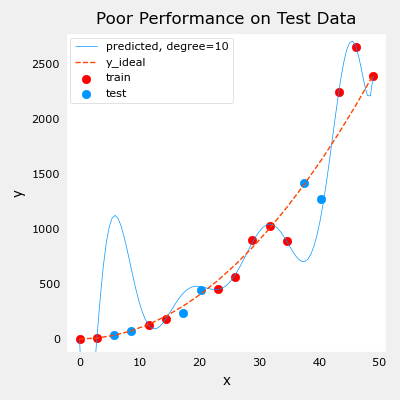

In [34]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [35]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

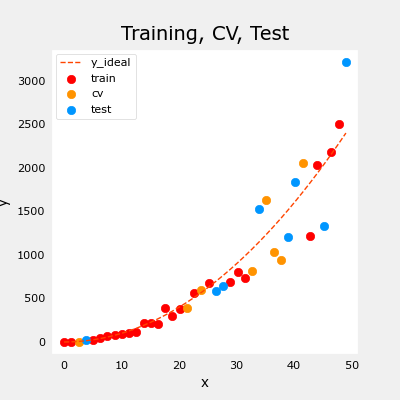

In [36]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [37]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

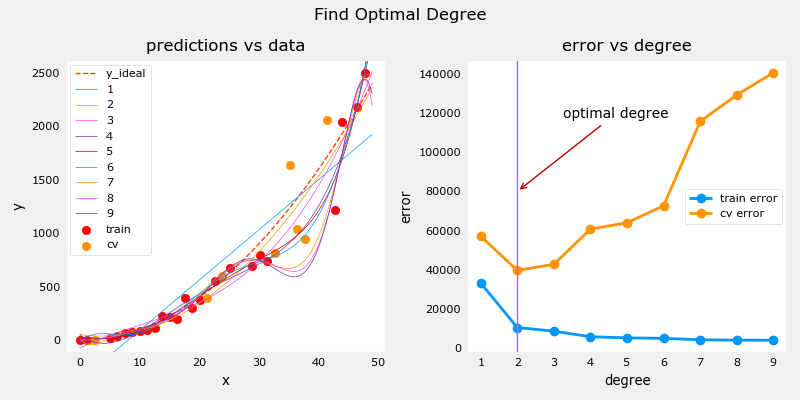

In [38]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [39]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

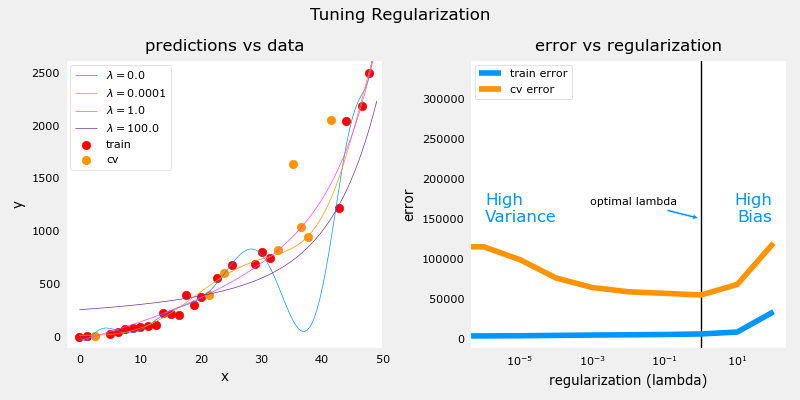

In [40]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

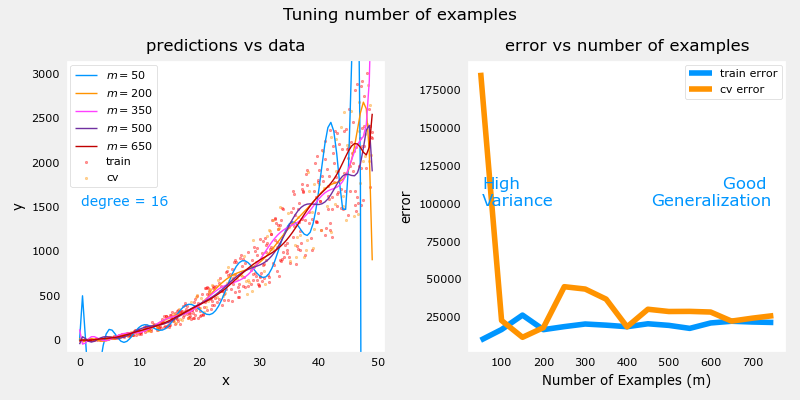

In [41]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [42]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


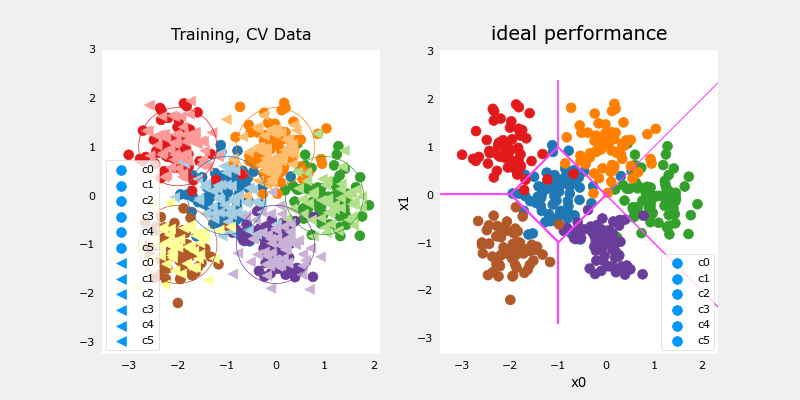

In [43]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [44]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:
            incorrect += 1
    cerr = incorrect/m
    ### START CODE HERE ### 
        
    ### END CODE HERE ### 
    
    return(cerr)

In [45]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [46]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(120,activation = 'relu',name="L1"),
        Dense(40,activation='relu',name='L2'),
        Dense(classes,activation='linear',name="L3")
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### END CODE HERE ### 
)

In [47]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 2s 6ms/step - loss: 1.0567
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4311
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3271
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2889
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2690
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3013
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2537
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2268
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2332
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2026
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2233
Epoch 12/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2113
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 4ms/step - loss: 0.1690
Epoch 102/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1541
Epoch 103/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1850
Epoch 104/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1639
Epoch 105/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1549
Epoch 106/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1521
Epoch 107/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 108/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1542
Epoch 109/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1474
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1494
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1568
Epoch 112/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1601
Epoch 113/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1099
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1112
Epoch 201/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1088
Epoch 202/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1063
Epoch 203/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0958
Epoch 204/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1173
Epoch 205/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1018
Epoch 206/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1089
Epoch 207/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1179
Epoch 208/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1075
Epoch 209/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1075
Epoch 210/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 211/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.0773
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0687
Epoch 299/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0617
Epoch 300/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0912
Epoch 301/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1183
Epoch 302/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0893
Epoch 303/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0943
Epoch 304/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0800
Epoch 305/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0903
Epoch 306/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0805
Epoch 307/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0791
Epoch 308/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0778
Epoch 309/1000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.0468
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0417
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 398/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 399/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1012
Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1006
Epoch 401/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1364
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1507
Epoch 403/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0874
Epoch 404/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0899
Epoch 405/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0914
Epoch 406/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0812
Epoch 407/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 494/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0330
Epoch 495/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0292
Epoch 496/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0323
Epoch 497/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0336
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0285
Epoch 500/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0310
Epoch 501/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 502/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0334
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 504/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350
Epoch 505/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.0334
Epoch 592/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348
Epoch 593/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0451
Epoch 594/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0332
Epoch 595/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0405
Epoch 596/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 597/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0395
Epoch 598/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350
Epoch 599/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0312
Epoch 600/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0312
Epoch 601/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 602/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 603/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 690/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0240
Epoch 691/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0219
Epoch 692/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 693/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0277
Epoch 694/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0213
Epoch 695/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 696/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0253
Epoch 697/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 699/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0300
Epoch 700/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0279
Epoch 701/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 788/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0207
Epoch 789/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 790/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 791/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 792/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0315
Epoch 793/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0200
Epoch 794/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0195
Epoch 795/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0274
Epoch 796/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0201
Epoch 797/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 798/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 799/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0293
Epoch 886/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0583
Epoch 887/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 888/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0263
Epoch 889/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0255
Epoch 890/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 891/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0306
Epoch 892/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 893/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 896/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 897/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 984/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 985/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 986/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 987/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0795
Epoch 988/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1024
Epoch 989/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1287
Epoch 990/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1589
Epoch 991/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 992/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1147
Epoch 993/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1399
Epoch 994/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 995/1000
13/1

In [48]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 3s 3ms/step


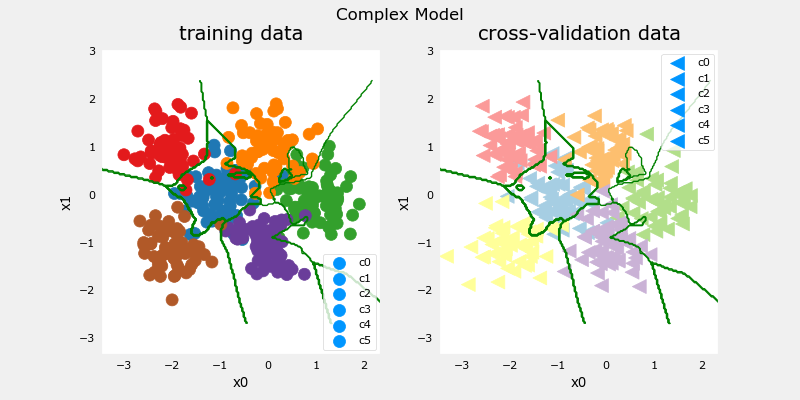

In [49]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [50]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 4ms/step
categorization error, training, complex model: 0.028
categorization error, cv,       complex model: 0.097


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [51]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(6,activation='relu',name="L1"),
        Dense(6,activation='linear',name="L2")
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)


In [52]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 5ms/step - loss: 1.7121
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.4800
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.2979
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.1229
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9745
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.8522
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.7606
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6839
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6186
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5596
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5101
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4715
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 4ms/step - loss: 0.1994
Epoch 102/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2008
Epoch 103/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2024
Epoch 104/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1979
Epoch 105/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1967
Epoch 106/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1971
Epoch 107/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1952
Epoch 108/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1959
Epoch 109/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1971
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1976
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1957
Epoch 112/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1975
Epoch 113/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1946
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 201/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 202/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1891
Epoch 203/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1896
Epoch 204/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1906
Epoch 205/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1889
Epoch 206/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1908
Epoch 207/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1882
Epoch 208/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1933
Epoch 209/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1887
Epoch 210/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1912
Epoch 211/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1888
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1867
Epoch 299/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1861
Epoch 300/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1864
Epoch 301/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1851
Epoch 302/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1886
Epoch 303/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1858
Epoch 304/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1935
Epoch 305/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1864
Epoch 306/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1853
Epoch 307/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1858
Epoch 308/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1862
Epoch 309/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1816
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1835
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1850
Epoch 398/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1849
Epoch 399/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1837
Epoch 400/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1854
Epoch 401/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1841
Epoch 402/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1835
Epoch 403/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1825
Epoch 404/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1829
Epoch 405/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1811
Epoch 406/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1821
Epoch 407/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1829
Epoch 494/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1830
Epoch 495/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1819
Epoch 496/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1870
Epoch 497/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1816
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1824
Epoch 499/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1823
Epoch 500/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1815
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1868
Epoch 502/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1840
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1826
Epoch 504/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1816
Epoch 505/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1831
Epoch 593/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1844
Epoch 594/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1827
Epoch 595/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1859
Epoch 596/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1818
Epoch 597/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1846
Epoch 598/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1813
Epoch 599/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1813
Epoch 600/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1830
Epoch 601/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1814
Epoch 602/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 603/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1813
Epoch 690/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1806
Epoch 691/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1809
Epoch 692/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1816
Epoch 693/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1822
Epoch 694/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 695/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1804
Epoch 696/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1807
Epoch 697/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1841
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1816
Epoch 699/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1814
Epoch 700/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1822
Epoch 701/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1831
Epoch 788/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1799
Epoch 789/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1810
Epoch 790/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1849
Epoch 791/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1801
Epoch 792/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1811
Epoch 793/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 794/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1872
Epoch 795/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1807
Epoch 796/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1847
Epoch 797/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1807
Epoch 798/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1833
Epoch 799/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1811
Epoch 886/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1798
Epoch 887/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1838
Epoch 888/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1817
Epoch 889/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1812
Epoch 890/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1833
Epoch 891/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1804
Epoch 892/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1816
Epoch 893/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1818
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1837
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1805
Epoch 896/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1813
Epoch 897/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1819
Epoch 984/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1810
Epoch 985/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1795
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1820
Epoch 987/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 988/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1818
Epoch 989/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1817
Epoch 990/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1801
Epoch 991/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1799
Epoch 992/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1815
Epoch 993/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1804
Epoch 994/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1798
Epoch 995/1000
13/1

In [53]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 6)                 18        
                                                                 
 L2 (Dense)                  (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 3s 3ms/step


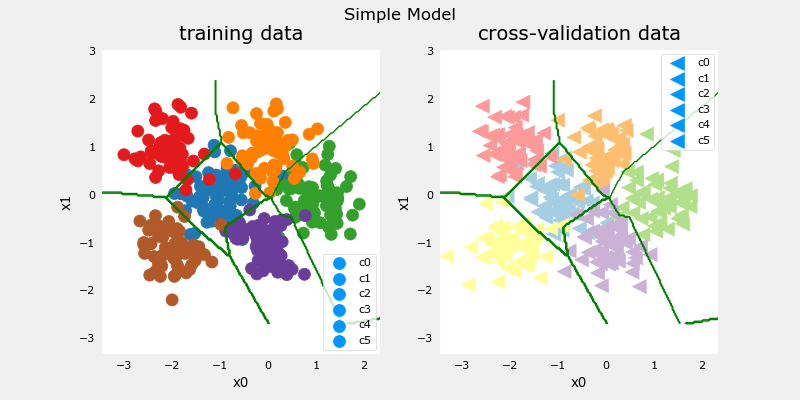

In [54]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [55]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 4ms/step
categorization error, training, simple model, 0.068, complex model: 0.028
categorization error, cv,       simple model, 0.066, complex model: 0.097


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [56]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1),name="L1"),
        Dense(40,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1),name="L2"),
        Dense(6,activation='linear',name="L3")
        ### START CODE HERE ### 
    ], name= "Simple"
)
model_r.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)


In [57]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 2s 7ms/step - loss: 4.3663
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.5316
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.2165
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.0196
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9559
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9268
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9013
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8527
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7941
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.7611
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.7444
Epoch 12/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.7388
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 4ms/step - loss: 0.4880
Epoch 102/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4695
Epoch 103/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4675
Epoch 104/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4590
Epoch 105/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5046
Epoch 106/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4812
Epoch 107/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4696
Epoch 108/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4798
Epoch 109/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4602
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4545
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4582
Epoch 112/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4524
Epoch 113/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.4071
Epoch 200/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4038
Epoch 201/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4241
Epoch 202/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3985
Epoch 203/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4026
Epoch 204/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4089
Epoch 205/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4571
Epoch 206/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4307
Epoch 207/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4125
Epoch 208/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4206
Epoch 209/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4368
Epoch 210/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4145
Epoch 211/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3900
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4027
Epoch 299/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4003
Epoch 300/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4286
Epoch 301/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3992
Epoch 302/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3911
Epoch 303/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3905
Epoch 304/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3800
Epoch 305/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3770
Epoch 306/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3870
Epoch 307/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3919
Epoch 308/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3971
Epoch 309/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3890
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3823
Epoch 397/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3915
Epoch 398/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3804
Epoch 399/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3811
Epoch 400/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3804
Epoch 401/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3602
Epoch 402/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3627
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3601
Epoch 404/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3593
Epoch 405/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3548
Epoch 406/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3573
Epoch 407/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3521
Epoch 494/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3497
Epoch 495/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3509
Epoch 496/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3703
Epoch 497/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4020
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3537
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3413
Epoch 500/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3638
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3535
Epoch 502/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3626
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3921
Epoch 504/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3783
Epoch 505/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3458
Epoch 592/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3413
Epoch 593/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3414
Epoch 594/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3400
Epoch 595/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4164
Epoch 596/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3887
Epoch 597/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3471
Epoch 598/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3401
Epoch 599/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3397
Epoch 600/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3534
Epoch 601/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3325
Epoch 602/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3462
Epoch 603/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3918
Epoch 690/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3762
Epoch 691/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3538
Epoch 692/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3468
Epoch 693/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3331
Epoch 694/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3370
Epoch 695/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3326
Epoch 696/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3316
Epoch 697/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3291
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3465
Epoch 699/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3429
Epoch 700/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3425
Epoch 701/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3408
Epoch 788/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3303
Epoch 789/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3358
Epoch 790/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3412
Epoch 791/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3756
Epoch 792/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3884
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3706
Epoch 794/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3908
Epoch 795/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3798
Epoch 796/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3957
Epoch 797/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3403
Epoch 798/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3729
Epoch 799/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3580
Epoch 886/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3364
Epoch 887/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3298
Epoch 888/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3342
Epoch 889/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3250
Epoch 890/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3570
Epoch 891/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3290
Epoch 892/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3279
Epoch 893/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3530
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3600
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3978
Epoch 896/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3560
Epoch 897/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3140
Epoch 984/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3311
Epoch 985/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3471
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3497
Epoch 987/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3469
Epoch 988/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3212
Epoch 989/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3304
Epoch 990/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3319
Epoch 991/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3438
Epoch 992/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3450
Epoch 993/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3336
Epoch 994/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3225
Epoch 995/1000
13/1

In [58]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
ddd
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 3s 3ms/step


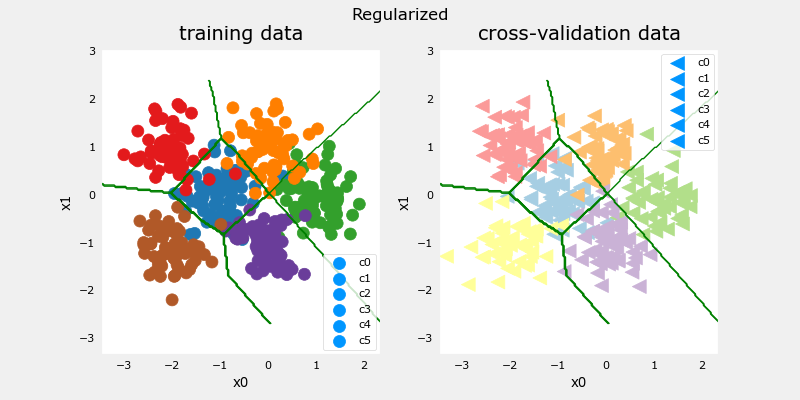

In [59]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [60]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 9ms/step
categorization error, training, regularized: 0.072, simple model, 0.068, complex model: 0.028
categorization error, cv,       regularized: 0.069, simple model, 0.066, complex model: 0.097


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [64]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 2s 6ms/step - loss: 1.0214
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4297
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3181
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2681
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2764
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2937
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2465
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2192
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2278
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2043
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2255
Epoch 12/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2094
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 4ms/step - loss: 0.1788
Epoch 102/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1698
Epoch 103/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1854
Epoch 104/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1672
Epoch 105/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1491
Epoch 106/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 107/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1540
Epoch 108/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1452
Epoch 109/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1535
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1448
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1529
Epoch 112/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1633
Epoch 113/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1162
Epoch 200/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1241
Epoch 201/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1023
Epoch 202/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1081
Epoch 203/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1128
Epoch 204/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1201
Epoch 205/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1017
Epoch 206/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1098
Epoch 207/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1184
Epoch 208/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1211
Epoch 209/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1070
Epoch 210/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1028
Epoch 211/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0689
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0785
Epoch 299/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 300/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 301/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 302/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1095
Epoch 303/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1267
Epoch 304/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0847
Epoch 305/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1012
Epoch 306/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 307/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1088
Epoch 308/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1120
Epoch 309/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0907
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 397/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0562
Epoch 398/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0600
Epoch 399/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 400/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0594
Epoch 401/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0906
Epoch 402/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0998
Epoch 403/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 404/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 405/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0501
Epoch 406/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 407/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.0401
Epoch 494/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0413
Epoch 495/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 496/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0513
Epoch 497/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0433
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0397
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 500/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 502/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0379
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0408
Epoch 504/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 505/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 592/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0445
Epoch 593/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 594/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0350
Epoch 595/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0288
Epoch 596/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0259
Epoch 597/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0255
Epoch 598/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0239
Epoch 599/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 600/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0417
Epoch 601/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 602/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 603/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0387
Epoch 690/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0268
Epoch 691/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0282
Epoch 692/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0250
Epoch 693/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 694/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0264
Epoch 695/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0545
Epoch 696/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0370
Epoch 697/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0644
Epoch 699/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 700/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0303
Epoch 701/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0249
Epoch 788/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0275
Epoch 789/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 790/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 791/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 792/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 794/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 795/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 796/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0273
Epoch 797/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0272
Epoch 798/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0230
Epoch 799/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 886/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 887/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0210
Epoch 888/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 889/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 890/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0236
Epoch 891/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 892/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0203
Epoch 893/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 894/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0246
Epoch 896/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0235
Epoch 897/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0917
Epoch 984/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0329
Epoch 985/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0334
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 987/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0264
Epoch 988/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 989/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 990/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0300
Epoch 991/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 992/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0362
Epoch 993/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0558
Epoch 994/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0397
Epoch 995/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2441
Epoch 83/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2362
Epoch 84/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2360
Epoch 85/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2490
Epoch 86/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2279
Epoch 87/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2323
Epoch 88/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2350
Epoch 89/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2293
Epoch 90/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2248
Epoch 91/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2177
Epoch 92/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2165
Epoch 93/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2176
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 182/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2166
Epoch 183/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2089
Epoch 184/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2076
Epoch 185/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2074
Epoch 186/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2001
Epoch 187/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2034
Epoch 188/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2062
Epoch 189/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2051
Epoch 190/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2076
Epoch 191/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2130
Epoch 192/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2062
Epoch 193/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1992
Epoch 280/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2021
Epoch 281/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2018
Epoch 282/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1949
Epoch 283/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2049
Epoch 284/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1941
Epoch 285/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1818
Epoch 286/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1922
Epoch 287/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1957
Epoch 288/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2141
Epoch 289/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1992
Epoch 290/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1991
Epoch 291/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1800
Epoch 378/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1876
Epoch 379/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1888
Epoch 380/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1819
Epoch 381/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1845
Epoch 382/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1898
Epoch 383/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1957
Epoch 384/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1922
Epoch 385/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1821
Epoch 386/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1814
Epoch 387/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1854
Epoch 388/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1848
Epoch 389/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1847
Epoch 476/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1835
Epoch 477/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1802
Epoch 478/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 479/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1780
Epoch 480/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1785
Epoch 481/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1739
Epoch 482/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1748
Epoch 483/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1796
Epoch 484/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1838
Epoch 485/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1718
Epoch 486/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1741
Epoch 487/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1740
Epoch 574/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1693
Epoch 575/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1672
Epoch 576/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1665
Epoch 577/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1705
Epoch 578/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1707
Epoch 579/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1685
Epoch 580/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1782
Epoch 581/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1663
Epoch 582/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1621
Epoch 583/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1688
Epoch 584/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1731
Epoch 585/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1651
Epoch 672/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1701
Epoch 673/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1694
Epoch 674/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1765
Epoch 675/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1710
Epoch 676/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1620
Epoch 677/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1629
Epoch 678/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1605
Epoch 679/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1712
Epoch 680/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1719
Epoch 681/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1801
Epoch 682/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1830
Epoch 683/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1586
Epoch 770/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1591
Epoch 771/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1666
Epoch 772/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1576
Epoch 773/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1690
Epoch 774/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1693
Epoch 775/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1726
Epoch 776/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1567
Epoch 777/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1685
Epoch 778/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1774
Epoch 779/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1618
Epoch 780/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1582
Epoch 781/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1568
Epoch 868/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1605
Epoch 869/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1605
Epoch 870/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1695
Epoch 871/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1611
Epoch 872/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1556
Epoch 873/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1536
Epoch 874/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 875/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1606
Epoch 876/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 877/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1569
Epoch 878/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1616
Epoch 879/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 966/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1539
Epoch 967/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1693
Epoch 968/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1691
Epoch 969/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1596
Epoch 970/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1651
Epoch 971/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1551
Epoch 972/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1552
Epoch 973/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1553
Epoch 974/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1640
Epoch 975/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1601
Epoch 976/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1527
Epoch 977/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3326
Epoch 65/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3404
Epoch 66/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3199
Epoch 67/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3410
Epoch 68/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3495
Epoch 69/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3165
Epoch 70/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3215
Epoch 71/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3230
Epoch 72/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2896
Epoch 73/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2985
Epoch 74/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3054
Epoch 75/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3173
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 3ms/step - loss: 0.2855
Epoch 164/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2920
Epoch 165/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2914
Epoch 166/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2939
Epoch 167/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2806
Epoch 168/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2856
Epoch 169/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2821
Epoch 170/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2855
Epoch 171/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch 172/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2608
Epoch 173/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2875
Epoch 174/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2948
Epoch 175/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2825
Epoch 262/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2643
Epoch 263/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2632
Epoch 264/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 265/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2684
Epoch 266/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2752
Epoch 267/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2709
Epoch 268/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 269/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2578
Epoch 270/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2708
Epoch 271/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2599
Epoch 272/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 273/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2542
Epoch 360/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2731
Epoch 361/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2547
Epoch 362/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2863
Epoch 363/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2810
Epoch 364/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2677
Epoch 365/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2561
Epoch 366/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2580
Epoch 367/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2778
Epoch 368/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2695
Epoch 369/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2566
Epoch 370/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2565
Epoch 371/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2374
Epoch 458/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2552
Epoch 459/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2484
Epoch 460/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2416
Epoch 461/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2648
Epoch 462/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2380
Epoch 463/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2371
Epoch 464/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2476
Epoch 465/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2606
Epoch 466/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2607
Epoch 467/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2521
Epoch 468/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2516
Epoch 469/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2410
Epoch 556/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2323
Epoch 557/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2381
Epoch 558/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2480
Epoch 559/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2641
Epoch 560/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2518
Epoch 561/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2483
Epoch 562/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2571
Epoch 563/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2354
Epoch 564/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2428
Epoch 565/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2374
Epoch 566/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2402
Epoch 567/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 654/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2461
Epoch 655/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2352
Epoch 656/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2292
Epoch 657/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2294
Epoch 658/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2397
Epoch 659/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2378
Epoch 660/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2352
Epoch 661/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2284
Epoch 662/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2455
Epoch 663/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2360
Epoch 664/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2507
Epoch 665/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.2318
Epoch 752/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2485
Epoch 753/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2223
Epoch 754/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2343
Epoch 755/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2269
Epoch 756/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2448
Epoch 757/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2443
Epoch 758/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2319
Epoch 759/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2288
Epoch 760/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2457
Epoch 761/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2507
Epoch 762/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2344
Epoch 763/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2229
Epoch 850/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2270
Epoch 851/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2337
Epoch 852/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2491
Epoch 853/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2373
Epoch 854/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2430
Epoch 855/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2369
Epoch 856/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2217
Epoch 857/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2284
Epoch 858/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2316
Epoch 859/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2424
Epoch 860/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2340
Epoch 861/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2367
Epoch 948/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2415
Epoch 949/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2260
Epoch 950/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2208
Epoch 951/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2295
Epoch 952/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2499
Epoch 953/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2402
Epoch 954/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2390
Epoch 955/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 956/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2359
Epoch 957/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2347
Epoch 958/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 959/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4567
Epoch 47/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4256
Epoch 48/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4807
Epoch 49/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4628
Epoch 50/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4295
Epoch 51/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4436
Epoch 52/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4295
Epoch 53/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4413
Epoch 54/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4216
Epoch 55/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4607
Epoch 56/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4148
Epoch 57/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4320
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 6ms/step - loss: 0.3589
Epoch 146/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3576
Epoch 147/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3881
Epoch 148/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3662
Epoch 149/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3577
Epoch 150/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3559
Epoch 151/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3528
Epoch 152/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3500
Epoch 153/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3742
Epoch 154/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3539
Epoch 155/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3573
Epoch 156/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3600
Epoch 157/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3296
Epoch 244/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3422
Epoch 245/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3399
Epoch 246/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3376
Epoch 247/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3280
Epoch 248/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3426
Epoch 249/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3536
Epoch 250/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3390
Epoch 251/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3656
Epoch 252/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3370
Epoch 253/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3351
Epoch 254/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3584
Epoch 255/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3261
Epoch 342/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3387
Epoch 343/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3234
Epoch 344/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3174
Epoch 345/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3169
Epoch 346/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3262
Epoch 347/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3259
Epoch 348/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3328
Epoch 349/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3074
Epoch 350/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3305
Epoch 351/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3148
Epoch 352/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3392
Epoch 353/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3078
Epoch 440/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3051
Epoch 441/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3133
Epoch 442/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3240
Epoch 443/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3159
Epoch 444/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3088
Epoch 445/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3218
Epoch 446/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3097
Epoch 447/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3404
Epoch 448/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3277
Epoch 449/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3045
Epoch 450/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3057
Epoch 451/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3604
Epoch 538/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3220
Epoch 539/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2922
Epoch 540/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3119
Epoch 541/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3273
Epoch 542/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3294
Epoch 543/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3212
Epoch 544/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3084
Epoch 545/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3018
Epoch 546/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3156
Epoch 547/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3269
Epoch 548/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3076
Epoch 549/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3282
Epoch 636/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3158
Epoch 637/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3096
Epoch 638/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2961
Epoch 639/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2992
Epoch 640/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2956
Epoch 641/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2879
Epoch 642/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3080
Epoch 643/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3160
Epoch 644/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2902
Epoch 645/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3127
Epoch 646/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3206
Epoch 647/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3001
Epoch 734/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3113
Epoch 735/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3117
Epoch 736/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3183
Epoch 737/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3265
Epoch 738/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3007
Epoch 739/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3182
Epoch 740/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3078
Epoch 741/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3206
Epoch 742/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3500
Epoch 743/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2950
Epoch 744/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2923
Epoch 745/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3072
Epoch 832/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3207
Epoch 833/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3243
Epoch 834/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2938
Epoch 835/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2934
Epoch 836/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2822
Epoch 837/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2982
Epoch 838/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2980
Epoch 839/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2910
Epoch 840/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3042
Epoch 841/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2816
Epoch 842/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3013
Epoch 843/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3007
Epoch 930/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3069
Epoch 931/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3552
Epoch 932/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3031
Epoch 933/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3028
Epoch 934/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3293
Epoch 935/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2964
Epoch 936/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2889
Epoch 937/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2890
Epoch 938/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2992
Epoch 939/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2894
Epoch 940/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2839
Epoch 941/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.6127
Epoch 29/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5965
Epoch 30/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6216
Epoch 31/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6169
Epoch 32/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6319
Epoch 33/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6148
Epoch 34/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6624
Epoch 35/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6406
Epoch 36/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6279
Epoch 37/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5920
Epoch 38/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5670
Epoch 39/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5695
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 4ms/step - loss: 0.4481
Epoch 128/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4374
Epoch 129/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4431
Epoch 130/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4389
Epoch 131/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4580
Epoch 132/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4333
Epoch 133/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4290
Epoch 134/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4492
Epoch 135/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4442
Epoch 136/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4528
Epoch 137/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4339
Epoch 138/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4442
Epoch 139/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4324
Epoch 226/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4243
Epoch 227/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4401
Epoch 228/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3934
Epoch 229/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4041
Epoch 230/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4108
Epoch 231/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4049
Epoch 232/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4152
Epoch 233/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3971
Epoch 234/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3957
Epoch 235/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3893
Epoch 236/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3963
Epoch 237/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4096
Epoch 324/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4010
Epoch 325/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3900
Epoch 326/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3841
Epoch 327/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3753
Epoch 328/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3961
Epoch 329/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3790
Epoch 330/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3641
Epoch 331/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3679
Epoch 332/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3722
Epoch 333/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4095
Epoch 334/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3950
Epoch 335/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3769
Epoch 422/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3910
Epoch 423/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3707
Epoch 424/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3732
Epoch 425/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3589
Epoch 426/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3573
Epoch 427/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3629
Epoch 428/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3754
Epoch 429/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3693
Epoch 430/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3638
Epoch 431/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3529
Epoch 432/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3627
Epoch 433/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3681
Epoch 520/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3666
Epoch 521/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3451
Epoch 522/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3622
Epoch 523/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3736
Epoch 524/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3380
Epoch 525/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3528
Epoch 526/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3588
Epoch 527/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3394
Epoch 528/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3450
Epoch 529/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3741
Epoch 530/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3659
Epoch 531/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3274
Epoch 618/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3779
Epoch 619/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4187
Epoch 620/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3985
Epoch 621/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3442
Epoch 622/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3446
Epoch 623/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3509
Epoch 624/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3360
Epoch 625/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3308
Epoch 626/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3422
Epoch 627/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3547
Epoch 628/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3688
Epoch 629/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3261
Epoch 716/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3306
Epoch 717/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3714
Epoch 718/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3634
Epoch 719/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4004
Epoch 720/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3961
Epoch 721/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3827
Epoch 722/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3487
Epoch 723/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3664
Epoch 724/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3384
Epoch 725/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3656
Epoch 726/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3492
Epoch 727/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3288
Epoch 814/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3376
Epoch 815/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3419
Epoch 816/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3391
Epoch 817/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3553
Epoch 818/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3539
Epoch 819/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3277
Epoch 820/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3660
Epoch 821/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3877
Epoch 822/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3608
Epoch 823/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3444
Epoch 824/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3453
Epoch 825/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3254
Epoch 912/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3222
Epoch 913/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3270
Epoch 914/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3549
Epoch 915/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3484
Epoch 916/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3540
Epoch 917/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3402
Epoch 918/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3401
Epoch 919/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3535
Epoch 920/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3696
Epoch 921/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3394
Epoch 922/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3422
Epoch 923/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 1.0593
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.0111
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9830
Epoch 12/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9629
Epoch 13/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9535
Epoch 14/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9582
Epoch 15/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9069
Epoch 16/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9013
Epoch 17/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9175
Epoch 18/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9090
Epoch 19/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.8781
Epoch 20/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.8701
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5734
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5706
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5696
Epoch 112/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5614
Epoch 113/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5564
Epoch 114/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5542
Epoch 115/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5550
Epoch 116/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5584
Epoch 117/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5897
Epoch 118/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5824
Epoch 119/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5813
Epoch 120/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5693
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.5095
Epoch 208/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5198
Epoch 209/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5268
Epoch 210/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5047
Epoch 211/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5161
Epoch 212/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4907
Epoch 213/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4848
Epoch 214/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4863
Epoch 215/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4893
Epoch 216/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5013
Epoch 217/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4900
Epoch 218/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4987
Epoch 219/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4530
Epoch 306/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4730
Epoch 307/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4621
Epoch 308/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4525
Epoch 309/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4640
Epoch 310/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4549
Epoch 311/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4471
Epoch 312/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4472
Epoch 313/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4541
Epoch 314/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4551
Epoch 315/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4493
Epoch 316/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4469
Epoch 317/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4384
Epoch 404/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4372
Epoch 405/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4245
Epoch 406/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4314
Epoch 407/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4436
Epoch 408/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4487
Epoch 409/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4291
Epoch 410/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4469
Epoch 411/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4694
Epoch 412/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4343
Epoch 413/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4386
Epoch 414/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4431
Epoch 415/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4087
Epoch 502/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4202
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4485
Epoch 504/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4454
Epoch 505/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4391
Epoch 506/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4540
Epoch 507/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4391
Epoch 508/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4034
Epoch 509/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4196
Epoch 510/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4118
Epoch 511/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4175
Epoch 512/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4238
Epoch 513/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3969
Epoch 600/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4083
Epoch 601/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3983
Epoch 602/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4082
Epoch 603/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3995
Epoch 604/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3981
Epoch 605/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3995
Epoch 606/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4233
Epoch 607/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4255
Epoch 608/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4219
Epoch 609/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4067
Epoch 610/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4221
Epoch 611/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3914
Epoch 698/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4074
Epoch 699/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3964
Epoch 700/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3858
Epoch 701/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4001
Epoch 702/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4066
Epoch 703/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4077
Epoch 704/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4246
Epoch 705/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4079
Epoch 706/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4038
Epoch 707/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4110
Epoch 708/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3941
Epoch 709/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4442
Epoch 796/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4432
Epoch 797/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3787
Epoch 798/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3958
Epoch 799/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3952
Epoch 800/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3981
Epoch 801/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3811
Epoch 802/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3772
Epoch 803/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3733
Epoch 804/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3724
Epoch 805/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3890
Epoch 806/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3901
Epoch 807/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3794
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3782
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4261
Epoch 896/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3933
Epoch 897/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3897
Epoch 898/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3900
Epoch 899/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4153
Epoch 900/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4031
Epoch 901/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4358
Epoch 902/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4209
Epoch 903/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4017
Epoch 904/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3790
Epoch 905/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3871
Epoch 992/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3651
Epoch 993/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3736
Epoch 994/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3799
Epoch 995/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3839
Epoch 996/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3796
Epoch 997/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4104
Epoch 998/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3731
Epoch 999/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3890
Epoch 1000/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3903
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 2s 5ms/step - loss: 9.9761
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.3148


13/13 [==============================] - 0s 4ms/step - loss: 0.6888
Epoch 91/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6910
Epoch 92/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6803
Epoch 93/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6727
Epoch 94/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6722
Epoch 95/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6823
Epoch 96/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6657
Epoch 97/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6654
Epoch 98/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6775
Epoch 99/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6946
Epoch 100/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7011
Epoch 101/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6989
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5857
Epoch 190/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5750
Epoch 191/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5910
Epoch 192/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5844
Epoch 193/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5814
Epoch 194/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5663
Epoch 195/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5671
Epoch 196/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5605
Epoch 197/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5696
Epoch 198/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5643
Epoch 199/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5684
Epoch 200/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5781
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.5700
Epoch 288/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5632
Epoch 289/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5322
Epoch 290/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5338
Epoch 291/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5400
Epoch 292/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5188
Epoch 293/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5259
Epoch 294/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5269
Epoch 295/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5547
Epoch 296/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5277
Epoch 297/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5185
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5203
Epoch 299/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4987
Epoch 386/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4816
Epoch 387/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4984
Epoch 388/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5064
Epoch 389/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4970
Epoch 390/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4817
Epoch 391/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4861
Epoch 392/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4897
Epoch 393/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4857
Epoch 394/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4849
Epoch 395/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5126
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5295
Epoch 397/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.5139
Epoch 484/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4743
Epoch 485/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5026
Epoch 486/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4770
Epoch 487/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4758
Epoch 488/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4641
Epoch 489/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4548
Epoch 490/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4679
Epoch 491/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4739
Epoch 492/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4954
Epoch 493/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4729
Epoch 494/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4576
Epoch 495/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4882
Epoch 582/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4763
Epoch 583/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4752
Epoch 584/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4627
Epoch 585/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4876
Epoch 586/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4935
Epoch 587/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4622
Epoch 588/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4453
Epoch 589/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4408
Epoch 590/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4370
Epoch 591/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4485
Epoch 592/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4443
Epoch 593/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4443
Epoch 680/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4309
Epoch 681/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4571
Epoch 682/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4403
Epoch 683/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4413
Epoch 684/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4397
Epoch 685/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4438
Epoch 686/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4460
Epoch 687/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4332
Epoch 688/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4237
Epoch 689/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4679
Epoch 690/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4562
Epoch 691/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4586
Epoch 778/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4551
Epoch 779/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4427
Epoch 780/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4344
Epoch 781/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4620
Epoch 782/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4209
Epoch 783/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4322
Epoch 784/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4340
Epoch 785/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4152
Epoch 786/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4195
Epoch 787/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4262
Epoch 788/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4188
Epoch 789/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4197
Epoch 876/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4339
Epoch 877/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4207
Epoch 878/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4226
Epoch 879/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4194
Epoch 880/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4234
Epoch 881/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4374
Epoch 882/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4489
Epoch 883/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4812
Epoch 884/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4713
Epoch 885/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4575
Epoch 886/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4063
Epoch 887/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4158
Epoch 974/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4185
Epoch 975/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4149
Epoch 976/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4087
Epoch 977/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4129
Epoch 978/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4026
Epoch 979/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4183
Epoch 980/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4418
Epoch 981/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4293
Epoch 982/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4194
Epoch 983/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4041
Epoch 984/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4217
Epoch 985/1000
13/1

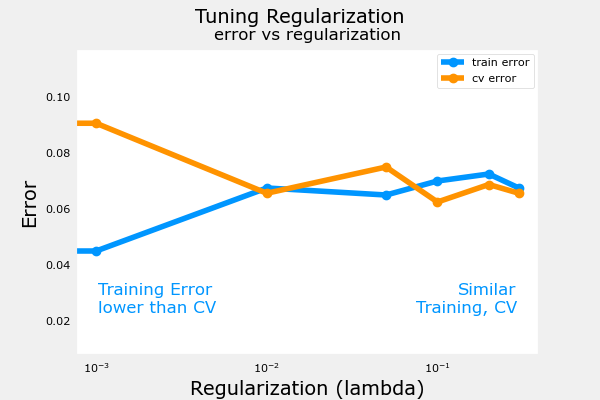

In [65]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 9ms/step


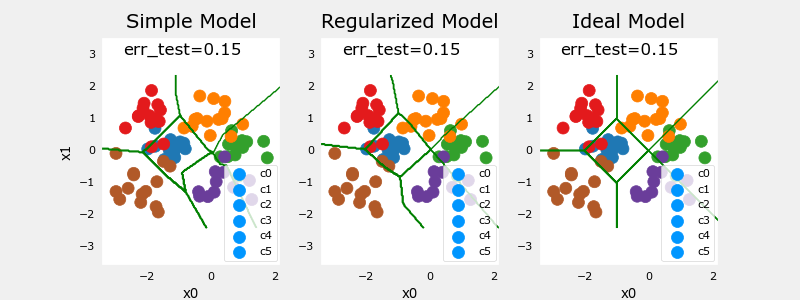

In [66]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)